<a href="https://colab.research.google.com/github/BerryStorm/fractal/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# trial and error

# The Essence of Fractal Geometry

Self-similar sets, self-affine sets, and more.

---
---

Made by Stanley Salim and supervised by Prokaj Rudolf Dániel

### List of Contents

0. Before We Begin
1. From An Intuitive Motivation (Sierpinski)
2. On Self-Similar Sets (Cantor)
3. On Self-Affine Sets (Koch)
4. Iterated Function Systems (Dragon)
5. Some Similarity Dimensions

---

## 0. Before We Begin

This is an interactive notebook about brief introduction to fractal geometry dedicated as an undergraduate individual research project. Although this explainer can be understood without having a very deep knowledge, it is always helpful to have the following background under our belt in order to have the fullest understanding about the topic:

1. Set Theory
2. Linear Algebra
3. Measure Theory
4. Analytic Geometry
5. Python Programming (optional)

The plan is to walk simultaneously through theoretical ideas given by the **markdown cells** alongside with bunch of examples and visualisation given by the **code cells**. Note that the notebook can be understood solely without any programming background. But for those who has even just a tiny bit of programming background, typically with Python, several code lines will have comments that indicate customisable parameters to play around with. Source codes are also available in the created [package](https://github.com/BerryStorm/fractal/tree/main/fractalpackage) on the [GitHub](https://github.com/BerryStorm/fractal) page.

> Please note that this notebook is created using Colaboratory, so it is recommended to use this platform, since some codes might not be compatible with some other Jupyter runners!

Happy reading!

---

## 1. From An Intuitive Motivation

We start off from a simple motivation and move on to a more rigorous math as the note grows.

<img src="https://github.com/BerryStorm/fractal/blob/main/img/headland.jpg?raw=1" alt="headland" width="33%"/>
<img src="https://github.com/BerryStorm/fractal/blob/main/img/tree.jpg?raw=1" alt="tree" width="33%"/>
<img src="https://github.com/BerryStorm/fractal/blob/main/img/frost.jpg?raw=1" alt="frost" width="33%"/>

Consider a piece of paper. On our human scale level, we see that the surface of a paper feels and looks smooth. But imagine zooming the paper to a microscopic scale, and we can guess that the surface of a paper is actually pretty rough. If our physical body is shrunk down to a considerably small scale level and we stand on the surface of the paper, it is most likely that the surface is not really flat and smooth, but rather wavy and fabricated.

This somehow gives us an idea that almost every object that we can see is "rough". And in mathematics, we want to make sure what we mean by roughness precisely. This raises the idea of finding some other objects that are, in some sense, not necessarily smooth. And some of the most interesting instance of these are the so called "fractals", whatever that mean. The pictures that we see in the beginning of this note are some real-life examples of these "fractals", but we will make it clear what we mean by that soon.

### Motivating Example: Sierpiński Triangle

To quickly understand what a fractal is, let's just construct one such. But before that, we need to lay some groundwork that is essential for the visualisation.

First, we copy the online repository that stores everything we need by running the following line of code.

In [1]:
!git clone https://github.com/BerryStorm/fractal.git

fatal: destination path 'fractal' already exists and is not an empty directory.


Next, we set a path in order to unpack the required package with the following code.

In [2]:
import sys
sys.path.insert(0,'/content/fractal')

Finally, we import the package we need.

In [3]:
import fractalpackage as fract

In [6]:
#fract.cantor.func()

math.sqrt(2)

NameError: ignored

Now we are all set! Back to constructing a very basic fractal, let's start with an equilateral triangle.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools
import sympy
import copy
import math


trianglex = [ 1, 10, 7, 1 ] 
triangley = [ 2, 8, 4, 2 ]    
triangle2x = [ 13, 25, 21, 13]
triangle2y = [ 5,  7 , 14, 5 ]

plt.figure('Triangles')
plt.plot(trianglex, triangley, 'o-')
plt.fill(trianglex, triangley)

plt.plot( triangle2x, triangle2y, 'o-')
plt.fill(triangle2x, triangle2y)

plt.show()

This is called the Sierpiński Triangle, one of the most well-known fractal in the world. Let's analyse it further. (n-gon)

The code shown above is the first five iterations of the procedure, hence an approximation of the self-similar Sierpiński triangle.

This second construction will be our main attention across this note, because we can get more insights from it, namely:

1. There is a contraction ratio c
2. there is a linear transformation
3. These linear transformation can be composed to represent each similar copies, and that is where the name "self-similar set" come from.

### Some Natural Definitions

cylinder, ratio

Seeing many definitions for the first time can be quite puzzling. The next section will familiarise these definitions with another example of fractal, presented in more details. 

---

## 2. On Self-Similar Sets

Another famous fractal that we are going to fit the definitions in is the Cantor set. (middle alpha)

### Cantor Set

Here is another classic example on the middle-third Cantor set.

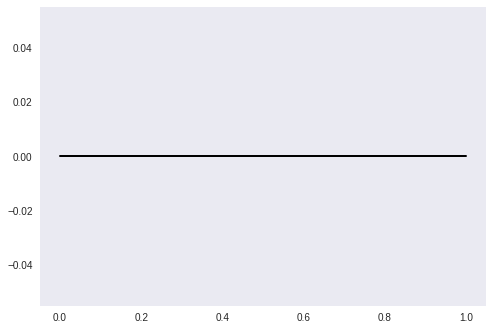

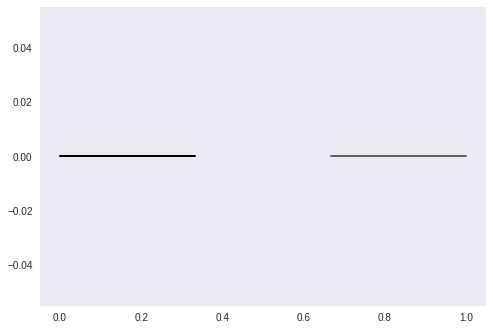

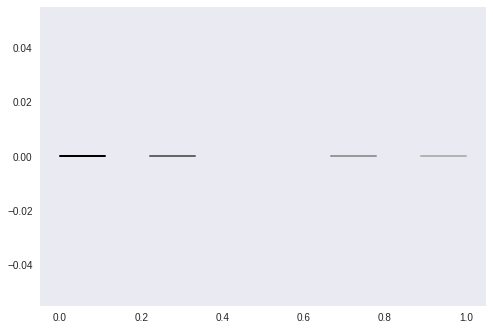

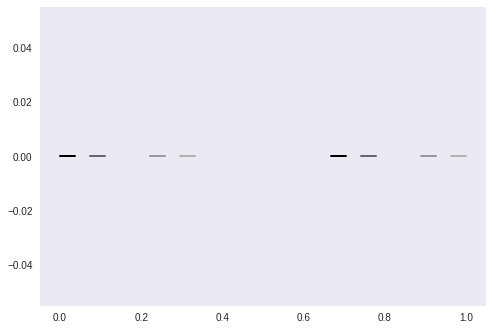

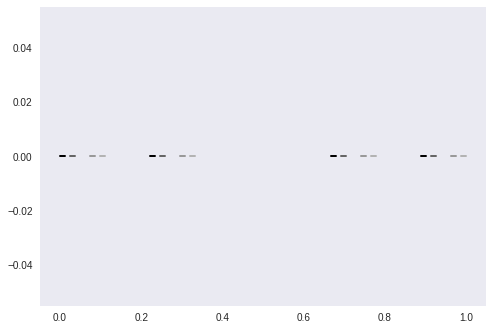

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools
import sympy
import copy
import math

class Cylinder:
    """
    Class representing a cylinder of a self-similar set.
    """

    def __init__(self, start, end):
        """
        Initialize a Cylinder object.
        
        Parameters:
            start : Tuple representing the initial coordinate of the cylinder.
            end   : Tuple representing the terminal coordinate of the cylinder.
        """
        self.start = start
        self.end = end


class IFS:
    """
    Class representing an iterated function systems of a self-similar set.
    """

    def __init__(self, family):
        """
        Initialize an IFS object.
        
        Parameters:
            family : Tuple containing family of Lipschitz functions.
        """
        self.fn = family

class Fractal:
    """
    Class representing a self-similar set.
    """

    def __init__(self, cylinder, ifs, n=1):
        """
        Initialize a Fractal object.
        
        Parameters:
            cylinder : List representing the cylinder(s) for the self-similar set.
            ifs      : Tuple representing the iterated function systems of the self-similar set.
            n        : Positive integer representing the level of iteration(s). (1 by default)
        """
        self.cyl = cylinder
        self.ifs = ifs
        self.lvl = n
    
    def add_ifs(self):
        """
        Define a new function for the ifs.
        """
        pass

    def mod_ifs(self):
        """
        Modify the current ifs.
        """
        pass

    def next(self):
        """
        Increase the cylinder level by one.
        """
        pass

    def plot(self, level):
        """
        Plot the fractal at the given level.
        """
        pass

cantor = [
            [[0, 0], [1, 0]]
        ]

def f1(cylinder):
    new_cylinder = copy.deepcopy(cylinder)
    new_cylinder[0] = [cylinder[0][0], cylinder[0][1]]
    new_cylinder[1] = [cylinder[0][0]+1/3*(cylinder[1][0]-cylinder[0][0]), cylinder[1][1]]
    return new_cylinder

def f2(cylinder):
    new_cylinder = copy.deepcopy(cylinder)
    new_cylinder[0] = [cylinder[0][0]+2/3*(cylinder[1][0]-cylinder[0][0]), cylinder[1][1]] 
    new_cylinder[1] = [cylinder[1][0], cylinder[1][1]]
    return new_cylinder

def make_cyl(base, n=1):
    if n==1:
        return base
    
    fractal = []
    for cylinder in base:
        fractal.append(f1(cylinder))
        fractal.append(f2(cylinder))
    return make_cyl(fractal, n-1)


def plot(base, level=2):

    n = level
    fractal = make_cyl(base, n)

    plt.style.use('seaborn-dark')
    # plt.axis('off')

    # plt.figure(figsize=(10,6))
    # plt.subplot(131)

    for cylinder in fractal:
        x = [coor[0] for coor in cylinder]
        y = [coor[1] for coor in cylinder]

        plt.plot(x, y)
    plt.show()

# koch = plt.figure()
# koch.plot([0,0], [1, 1])

for i in range(1, 6):
    plot(cantor, i)


# plt.fill to make sierpinski triangle
# put the x's coordinate and the y's coordinate into two lists,  and just make it back-end
# make separate python files at github

[[[0, 0], [1, 0]]]

[[[0, 0], [0.3333333333333333, 0]], [[0.6666666666666666, 0], [1, 0]]]

[[[0, 0], [0.1111111111111111, 0]], [[0.2222222222222222, 0], [0.3333333333333333, 0]], [[0.6666666666666666, 0], [0.7777777777777778, 0]], [[0.8888888888888888, 0], [1, 0]]]

[[[0, 0], [0.037037037037037035, 0]], [[0.07407407407407407, 0], [0.1111111111111111, 0]], [[0.2222222222222222, 0], [0.25925925925925924, 0]], [[0.2962962962962963, 0], [0.3333333333333333, 0]], [[0.6666666666666666, 0], [0.7037037037037037, 0]], [[0.7407407407407407, 0], [0.7777777777777778, 0]], [[0.8888888888888888, 0], [0.9259259259259259, 0]], [[0.9629629629629629, 0], [1, 0]]]


---

## 3. On Self-Affine Sets

#### (Variation of Koch Snowflakes/minkowski sausage, n-flake)

In this last example, we are going to make the notions as precise as we can and interact with the code as well, so as to get our hands on the heart of self-similar sets and verify our intuition about them.

The ... goes as follows:

1. 

2. 

3. 

---

## 4. Iterated Function Systems

#### Heighway Dragon (generalise it to dragon curves in the code)

As the name suggests, the Heighway Dragon is one of the coolest self-similar sets. This example will give us an idea that self-similar sets are not completely "self-similar", but just "self-similar-ish". Let's construct it by similar linear-algebraic way:

1. 

2. 

3. 

This gives us an idea that even a self-similar set that is constructed by lines (curves) can fill the space! A curve with this property is called a space-filling curve and discovered by Peano in ...

To make sure that we understand the basic notion of self-similar sets, contracting ratios, and iterated functions systems, we are going to look at one last interactive example where we can play around with it. 

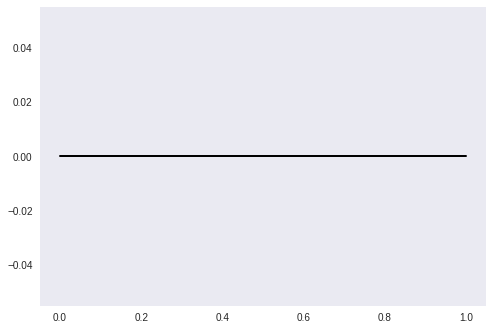

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools
import sympy

class Fractal:
    def __init__(self, cylinder, iterated_function_systems, level=1):
        self.cyl = cylinder
        self.ifs = iterated_function_systems
        self.lvl = level
    
    def add_ifs(self):
        """
        Define a new function for the ifs.
        """
        pass

    def mod_ifs(self):
        """
        Modify the current ifs.
        """
        pass

    def next(self):
        """
        Increase the cylinder level by one.
        """
        pass

    def plot(self, level):
        """
        Plot the fractal at the given level.
        """
        pass

cantor = [(0, 0), (1, 0)]

def cantor_ifs():
    return None

def plot_fractal():
    plt.style.use('seaborn-dark')
    # plt.axis('off')

    # plt.figure(figsize=(10,6))
    # plt.subplot(131)

    
    x = [pt[0] for pt in cantor]
    y = [pt[1] for pt in cantor]

    plt.plot(x, y)
    
    plt.show()

# koch = plt.figure()
# koch.plot([0,0], [1, 1])

plot_fractal()

In [ ]:
l = [[1, 2], [3, 4], [5, 6]]
l1 = [i[0] for i in l]
print(l1)

[1, 3, 5]


In [ ]:
import mod.

ModuleNotFoundError: ignored

In [ ]:
h

### Self-Similar Sets

Something explaining the self-similar sets

---

## Onto Formal Preliminaries

self-similar sets

contraction ratio

lipschitz mapping

linear mapping

iterated functions system

symbolic space

attractor

---

## Some Similarity Dimensions

### Notions

#### Box counting dimension

#### Hausdorf dimension

---

## Well-Separated VS Overlapping Cylinders

####

####

---

## Graph Directed Iterated Function Systems

#### ...

$\int_0^{\infty} x^2\,dx$

sqrt(3)

---
---

## References

1. Balázs Bárány, Károly Simon, & Boris Solomyak (Forthcoming 2022). Self-Similar and Self-Affine Sets and Measures.
2. Michael Keane, Károly Simon, & Boris Solomyak (2003). The dimension of graph directed attractors with overlaps on the line, with an application to a problem in fractal image recognition. Fundamenta Mathematicae, 180.

---

## EX. Coming Soon

- Well-Separated VS Overlapping Cylinders
- Graph Directed Iterated Function Systems
- ...